In [1]:
%load_ext autoreload 
%autoreload 2 

In [10]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # for subplots
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import tensorflow as tf

from src.utilities.plot_helpers import generate_random_colors
from src.modeling.experiments.binned_trial_experiment_01 import split_data

from src.utilities.pandas_helpers import get_features

## Experimental conditions: 
* 2 layer LSTM 
* trained with 128 units

#### Load Model

In [6]:


DATA_PATH = '/projects/p31961/gaby_data/aggregated_data/data_pipeline_full_dataset/datasets/full_dataset.parquet.gzip'
PATH_TO_MODELS = '/projects/p31961/ENIGMA/results/experiments/binned_trial_experiment_01/models'
control_path = os.path.join(PATH_TO_MODELS, 'control')
no_bins_path = os.path.join(PATH_TO_MODELS, 'dropped_binned_trials')


control_model = tf.keras.models.load_model(control_path)
dropped_bins_model = tf.keras.models.load_model(no_bins_path)


models = [control_model, dropped_bins_model]

2023-07-07 16:34:00.157928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_2_grad_concat_split_2_split_dim' with dtype int32
	 [[{{node gradients_split_2_grad_concat_split_2_split_dim}}]]
2023-07-07 16:34:00.158037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients_split_grad_concat_split_split_dim' with dtype int32
	 [[{{node gradients_split_grad_concat_split_split_dim}}]]
2023-07-07 16:34:00.158108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

# Model Summary

In [4]:
for model in models:
    print(model.summary())

Model: "stacked_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lambda_1 (Lambda)           multiple                  0         
                                                                 
 LSTM_1 (LSTM)               multiple                  66560     
                                                                 
 LSTM_2 (LSTM)               multiple                  131584    
                                                                 
 Dense_output (Dense)        multiple                  129       
                                                                 
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________


None
Model: "stacked_lstm_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Lambda_1 (Lambda)           multiple                  0         
                                                                 
 LSTM_1 (LSTM)               multiple                  66560     
                                                                 
 LSTM_2 (LSTM)               multiple                  131584    
                                                                 
 Dense_output (Dense)        multiple                  129       
                                                                 
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________
None


#### load training and testing data

In [9]:
data= pd.read_parquet(DATA_PATH)
data.head()

,time,mouse_id,sex_M,day,trial,learning_phase,event_cue,event_escape,event_avoid,latency,event_shock,sensor_D1,sensor_D2,sensor_DA,signal
0,-25.000000,12,0,5,0,0,1,0,0,0.0,0,0,1,0,-0.155359
1,-24.901531,12,0,5,0,0,1,0,0,0.0,0,0,1,0,-0.420553
2,-24.803064,12,0,5,0,0,1,0,0,0.0,0,0,1,0,-1.592294
3,-24.704596,12,0,5,0,0,1,0,0,0.0,0,0,1,0,-1.268734
4,-24.606127,12,0,5,0,0,1,0,0,0.0,0,0,1,0,-0.210176


In [13]:
# split data for control
target='signal'
control_features = get_features(data, target)
no_bin_features = control_features.copy()
no_bin_features.remove('learning_phase')

X_train, y_train, X_val, y_val, X_test, y_test = split_data(data, control_features, target, day_cut_off=6, feature_to_drop=None)

    # split data for dropped binned trials
X_train_dropped, y_train_dropped, X_val_dropped, y_val_dropped, X_test_dropped, y_test_dropped = split_data(
data, no_bin_features, target, day_cut_off=6, feature_to_drop='learning_phase')

In [42]:
X_test

,time,mouse_id,sex_M,day,trial,learning_phase,event_cue,event_escape,event_avoid,latency,event_shock,sensor_D1,sensor_D2,sensor_DA
1540066,-25.000000,0,0,7,0,0,1,0,0,0.0,0,1,0,0
1540067,-24.901531,0,0,7,0,0,1,0,0,0.0,0,1,0,0
1540068,-24.803064,0,0,7,0,0,1,0,0,0.0,0,1,0,0
1540069,-24.704596,0,0,7,0,0,1,0,0,0.0,0,1,0,0
1540070,-24.606127,0,0,7,0,0,1,0,0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336428,19.606127,9,1,7,3,0,0,1,0,0.0,0,0,1,0
2336429,19.704596,9,1,7,3,0,0,1,0,0.0,0,0,1,0
2336430,19.803064,9,1,7,3,0,0,1,0,0.0,0,0,1,0
2336431,19.901531,9,1,7,3,0,0,1,0,0.0,0,0,1,0


# Full dataset

In [43]:
y_prediction_control = control_model.predict(y_test)
y_prediction_dropped = dropped_bins_model.predict(y_test_dropped)


ValueError: in user code:

    File "/home/mds8301/.conda/envs/enigma/lib/python3.11/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/home/mds8301/.conda/envs/enigma/lib/python3.11/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/mds8301/.conda/envs/enigma/lib/python3.11/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/home/mds8301/.conda/envs/enigma/lib/python3.11/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/home/mds8301/.conda/envs/enigma/lib/python3.11/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Could not find matching concrete function to call loaded from the SavedModel. Got:
      Positional arguments (1 total):
        * <tf.Tensor 'inputs:0' shape=(None, 1) dtype=float32>
      Keyword arguments: {'training': False}
    
     Expected these arguments to match one of the following 4 option(s):
    
    Option 1:
      Positional arguments (1 total):
        * TensorSpec(shape=(None, 14), dtype=tf.float32, name='input_1')
      Keyword arguments: {'training': True}
    
    Option 2:
      Positional arguments (1 total):
        * TensorSpec(shape=(None, 14), dtype=tf.float32, name='input_1')
      Keyword arguments: {'training': False}
    
    Option 3:
      Positional arguments (1 total):
        * TensorSpec(shape=(None, 14), dtype=tf.float32, name='inputs')
      Keyword arguments: {'training': True}
    
    Option 4:
      Positional arguments (1 total):
        * TensorSpec(shape=(None, 14), dtype=tf.float32, name='inputs')
      Keyword arguments: {'training': False}


## Validation check

In [38]:
control_validation_data= X_test.assign(predicted_signal=y_prediction_control,
                                              actual_signal=y_prediction_dropped)
control_validation_data.query("sex_M==1 & event_cue==1 & sensor_DA==1").head()

,time,mouse_id,sex_M,day,trial,learning_phase,event_cue,event_escape,event_avoid,latency,event_shock,sensor_D1,sensor_D2,sensor_DA,predicted_signal,actual_signal
801312,-25.000000,8,1,6,0,0,1,0,0,0.0,0,0,0,1,-0.242541,-0.143817
801313,-24.901531,8,1,6,0,0,1,0,0,0.0,0,0,0,1,-0.239859,-0.048646
801314,-24.803064,8,1,6,0,0,1,0,0,0.0,0,0,0,1,-0.237217,-0.471040
801315,-24.704596,8,1,6,0,0,1,0,0,0.0,0,0,0,1,-0.234678,-1.007866
801316,-24.606127,8,1,6,0,0,1,0,0,0.0,0,0,0,1,-0.232271,-1.119513


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

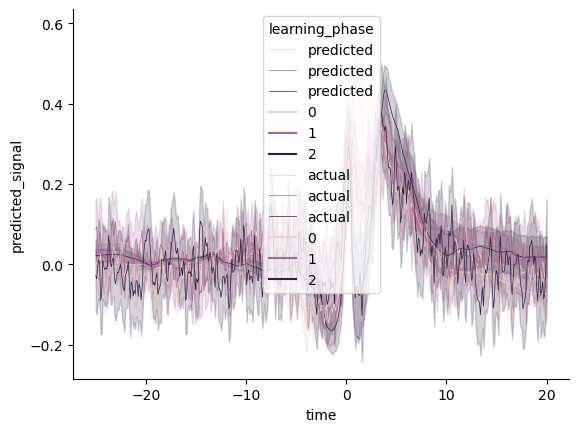

In [40]:
sns.lineplot(data = control_validation_data, x = 'time', y = 'predicted_signal', label = 'predicted', linewidth = 0.5, hue='learning_phase')
sns.lineplot(data = control_validation_data, x = 'time', y = 'actual_signal', label = 'actual', linewidth = 0.5, hue='learning_phase')
    
sns.despine()
plt.set_ylim(-1.5, 1.5)
plt.set_xlim(-25, 20)
plt.set_title(f'Day: {day}, Event: {event}, Sensor: {sensor}')
plt.set_ylabel('Z-score')
plt.set_xlabel('Time (s)')
legend = plt.legend(loc = "upper left", fontsize = 8, frameon = False)
    

In [12]:
# sensor_cols = ['sensor_DA', 'sensor_D1', 'sensor_D2']
# event_cols = ['event_cue', 'event_shock']
# signal_cols = ['unit_32_pred',
#                'unit_64_pred',
#                'unit_96_pred',
#                'unit_128_pred',
#                'true_signal']

# def reshape_df(df):
#     sensor_cols = ['sensor_DA', 'sensor_D1', 'sensor_D2']
#     event_cols = ['event_cue', 'event_shock']
#     signal_cols = ['unit_32_pred',
#                'unit_64_pred',
#                'unit_96_pred',
#                'unit_128_pred',
#                'true_signal']
#     return (df
#             # .drop(columns = ['trial'])
#             .assign(sensor = lambda df_: df_[sensor_cols].idxmax(axis = 1).str.replace('sensor_', ''),
#                    event = lambda df_: df_[event_cols].idxmax(axis = 1).str.replace('event_', ''))
#             .melt(id_vars = ['day', 'time', 'trial', 'sensor', 'event'], 
#                  value_vars = signal_cols, 
#                  var_name = 'signal_type', 
#                  value_name='z_score')
#             .assign(signal_type = lambda df_: df_['signal_type'].str.replace('_signal', ''))
#         #    .drop(columns = sensor_cols + event_cols)

#            )   
# reshaped_df = reshape_df(full_dataset)

In [ ]:
reshaped_df.head()

AttributeError: 'NoneType' object has no attribute 'set_ylim'

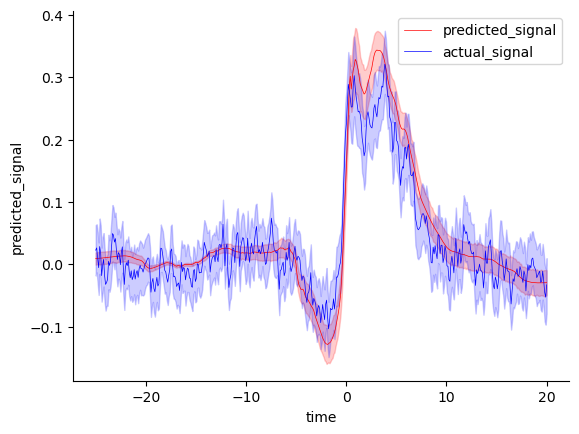

In [35]:


def plot_data(data, y_columns, colors,  day, event, sensor, ax):
    for column, color in zip(y_columns, colors):
        sns.lineplot(data = data, x = 'time', y = column, color = color, label = column, ax = ax, linewidth = 0.5)
    
    sns.despine()
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlim(-25, 20)
    ax.set_title(f'Day: {day}, Event: {event}, Sensor: {sensor}')
    ax.set_ylabel('Z-score')
    ax.set_xlabel('Time (s)')
    legend = ax.legend(loc = "upper left", fontsize = 8, frameon = False)
    

# Remove the legend outline
    legend.get_frame().set_linewidth(0)
    


### queries

In [14]:

# day_6_da_query = "day==6 & event_cue== 1 & sensor_DA==1 "
# day_6_cue_DA_query_result = full_dataset.query(day_6_da_query).drop(columns = ['event_shock', 'sensor_D1', 'sensor_D2'])


# day_7_da_query = "day==7 & event_cue== 1 & sensor_DA==1 "
# day_7_cue_DA_query_result = full_dataset.query(day_7_da_query).drop(columns = ['event_shock', 'sensor_D1', 'sensor_D2'])

# day_6_d1_query = "day==6 & event_cue== 1 & sensor_D1==1 "
# day_6_d1_query_result = full_dataset.query(day_6_d1_query).drop(columns = ['event_shock', 'sensor_D1', 'sensor_D2'])

# day_7_d1_query = "day==7 & event_cue== 1 & sensor_D1==1 "
# day_7_d1_query_result = full_dataset.query(day_7_d1_query)

# day_6_d2_query = "day==6 & event_cue== 1 & sensor_D2==1 "
# day_6_d2_query_result = full_dataset.query(day_6_d2_query)

# day_7_d2_query = "day==7 & event_cue== 1 & sensor_D2==1 "
# day_7_d2_query_result = full_dataset.query(day_6_d2_query)


# Results for day 6 and day 7 with cue and shock for each sensor

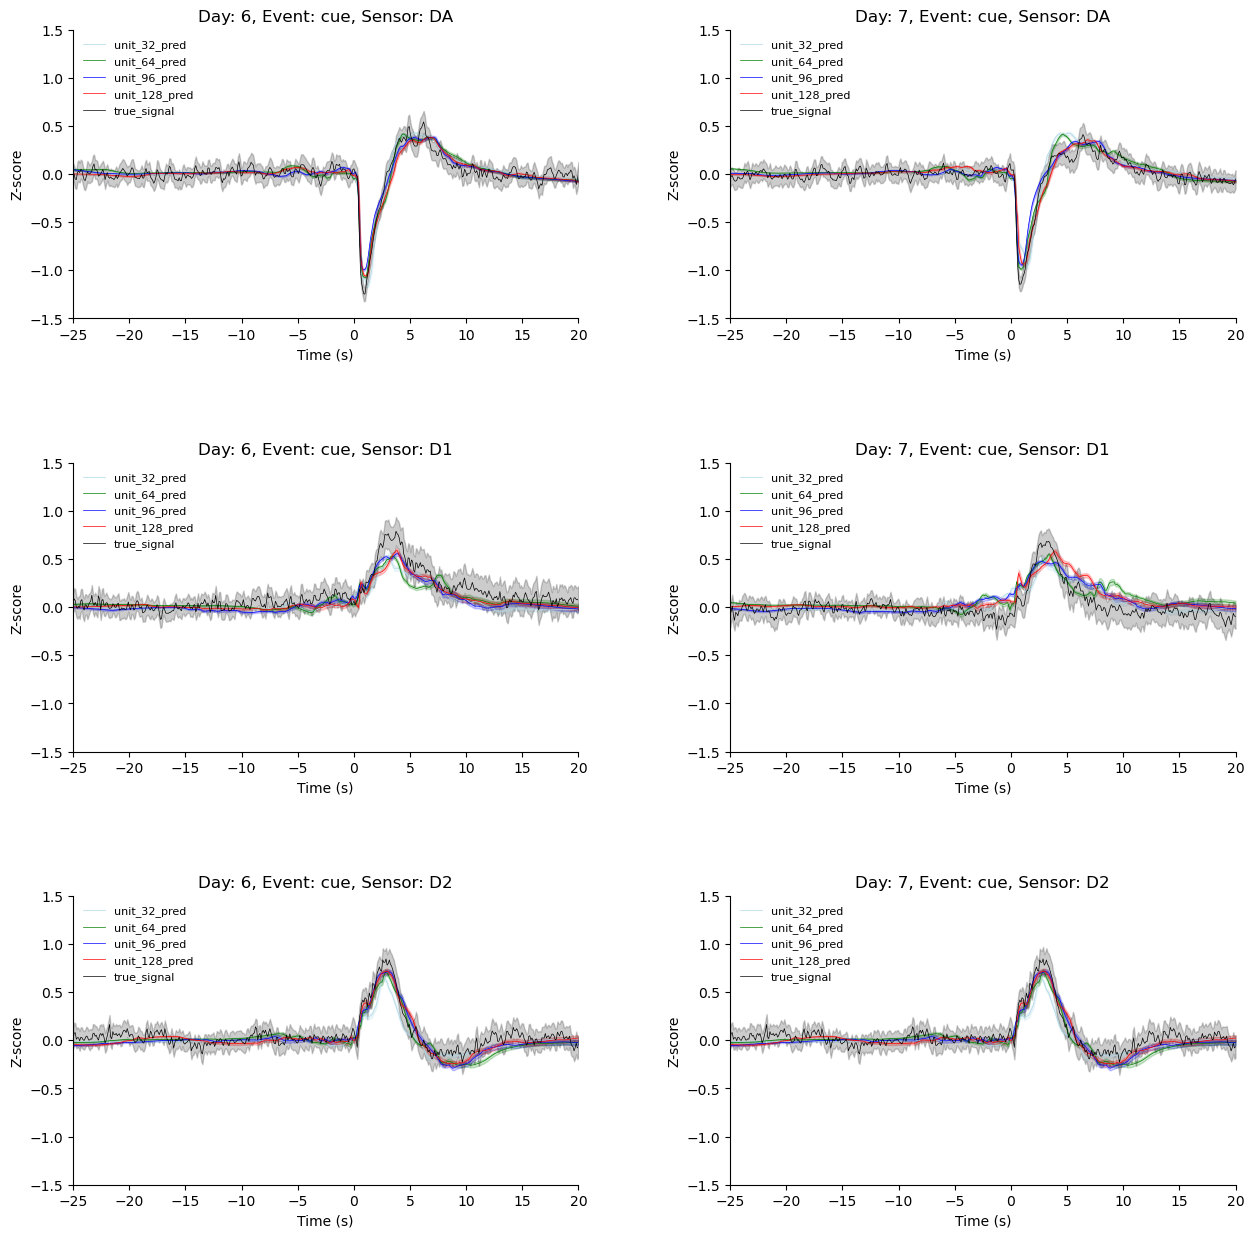

In [16]:
fig = plt.figure(figsize = (15,15))
cols = 2
rows = 3
gs = gridspec.GridSpec(rows, cols)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1], sharey = ax1)
ax3 = fig.add_subplot(gs[1,0], sharey = ax1)
ax4 = fig.add_subplot(gs[1,1], sharey = ax1)
ax5 = fig.add_subplot(gs[2,0], sharey = ax1)
ax6 = fig.add_subplot(gs[2,1], sharey = ax1)

# colors = generate_random_colors(len(signal_cols))
colors = ['lightblue', 'green', 'blue', 'red', 'black']

plot_data(data = day_6_cue_DA_query_result,y_columns = signal_cols,colors = colors, day =  6, event =  'cue', sensor = 'DA', ax = ax1)
plot_data(data = day_7_cue_DA_query_result,y_columns = signal_cols,colors = colors, day =  7, event =  'cue', sensor = 'DA', ax = ax2)
plot_data(data = day_6_d1_query_result,y_columns = signal_cols,colors = colors, day =  6, event = 'cue', sensor = 'D1', ax = ax3)
plot_data(data = day_7_d1_query_result,y_columns = signal_cols,colors = colors, day =  7, event = 'cue', sensor = 'D1', ax = ax4)
plot_data(data = day_6_d2_query_result,y_columns = signal_cols,colors = colors, day =  6, event = 'cue', sensor = 'D2', ax = ax5)
plot_data(data = day_7_d2_query_result,y_columns = signal_cols,colors = colors, day =  7, event = 'cue', sensor = 'D2', ax= ax6)
gs.update(hspace=0.5, wspace=0.3)
plt.show()




# Conclusions 
* Number of units does not have an much of an effect, but the addition of the second LSTM layer increased accuracy across all models. 
* 128 Units looks the best, but training time on 96 is lower and not much of a difference in 



# Next steps